<ipython-input-7-f3f959ca97ba>:209: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-7-f3f959ca97ba>:218: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


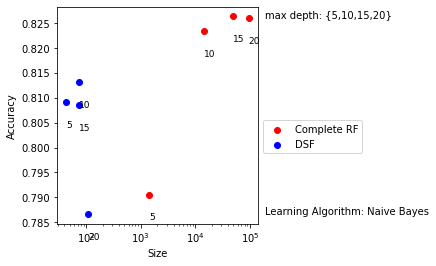

In [7]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# set dataset and run 
dataset = "adult"


variant = "NoLeafEdgesWithSplitValues"
scoring_function = 'accuracy'
pattern_max_size = 6
filesPath = "forests/rootedFrequentTrees"
filesPath_RF = "arch-forest/data"
sizePath = "SizeComparison"
nodes_count_list = []
for rf_depth in (5,10,15,20):
    for frequency in range(2,26):
        for pruning in ['','_pruned_with_sigma_0_0','_pruned_with_sigma_0_1','_pruned_with_sigma_0_2','_pruned_with_sigma_0_3']:
      
         with open(filesPath+'/'+dataset+'/'+variant+'/'+'leq'+str(pattern_max_size)+'/'+'RF_'+str(rf_depth)+pruning+'_t'+str(frequency)+'.json') as json_file:
             line = json_file.read()
             list = [i for i in range(len(line)) if line.startswith('"id"', i)]

             nodes_count_list.append('RF_'+str(rf_depth)+pruning+'_t'+str(frequency)+','+str(len(list))+',\n')
                                                
json_file.close()

f= open(sizePath+'/'+'nodesCount_'+dataset+'_'+variant+'_leq'+str(pattern_max_size)+'.csv',"w")
f.write('RF,nodes Count,\n')
for line in nodes_count_list:
        f.write(line)
f.close()


nodes_count_list = []
for rf_depth in (5,10,15,20):
    
      
     with open(filesPath_RF+'/'+dataset+'/text/'+'RF_'+str(rf_depth)+'.json') as json_file:
         line = json_file.read()
         list = [i for i in range(len(line)) if line.startswith('"id"', i)]
         
         nodes_count_list.append('RF_'+str(rf_depth)+','+str(len(list))+',\n')
                
        
          
            
json_file.close()

f= open(sizePath+'/'+'nodesCount_'+dataset+'_RandomForestClassifier'+'.csv',"w")
f.write('RF,nodes Count,\n')
for line in nodes_count_list:
        f.write(line)
f.close()





accuracy_list = []
accuracy_list_rf = []
size_list = []
size_list_rf = []
rf_list = []


with open(sizePath+'/'+'nodesCount_'+dataset+'_'+variant+'_leq'+str(pattern_max_size)+'.csv') as size_file:
        size_reader = csv.reader(size_file, delimiter='\n')
        line_count = 1
        for row in size_reader:
            if (line_count > 1 ):
                
                rowStr = str(row).split(',')                                       
                size_list.append(rowStr[1])
            line_count +=1    

size_file.close()

with open(sizePath+'/'+'nodesCount_'+dataset+'_RandomForestClassifier'+'.csv') as size_file:
        size_reader = csv.reader(size_file, delimiter='\n')
        line_count = 1
        for row in size_reader:
            if (line_count > 1 ):
                
                rowStr = str(row).split(',')                                       
                size_list_rf.append(rowStr[1])
            line_count +=1    

size_file.close()


for rf_depth in (5,10,15,20):
    
    with open(filesPath+'/'+dataset+'/Results_'+variant+'/leq'+str(pattern_max_size)+'/'+'RF_'+str(rf_depth)+'_'+scoring_function+'.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter='\n')
        line_count = 0
        for row in csv_reader:
            rowStr = str(row).split(',')
            if line_count < 120:
                accuracy_list.append(rowStr[1])
                rf_list.append('RF_'+str(rf_depth)+'_'+rowStr[0][2:])
                if (line_count == 5):
                    accuracy_list_rf.append(rowStr[4])
                line_count+=1
    csv_file.close()
    
    
    
f= open(sizePath+'/'+'nodesCount_accuracy_'+dataset+'_'+variant+'_leq'+str(pattern_max_size)+'.csv',"w")
f.write('RF,nodes Count,accuracy,\n')
for i in range(0,len(size_list)):
        f.write(rf_list[i]+','+size_list[i]+','+accuracy_list[i]+',\n')
for depth in (5,10,15,20):
        f.write('RF_'+str(depth)+','+size_list_rf[int(depth/5) -1]+','+accuracy_list_rf[int(depth/5) -1]+',\n')
f.close()



variant = "NoLeafEdgesWithSplitValues"
scoring_function = 'accuracy'
pattern_max_size = 6
filesPath = "forests/rootedFrequentTrees"
resultsPath = "SizeComparison"
accuracy_list = []
size_list = []

accuracy_list_dsf = []
size_list_dsf = []

with open(resultsPath+'/'+'nodesCount_accuracy_'+dataset+'_'+variant+'_leq'+str(pattern_max_size)+'.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter='\n')
        lineCount =1    
            
        for row in csv_reader:
                if (lineCount > 1 ):
                    rowStr = str(row).split(',')
                    if (lineCount > 481):
                        size_list.append(rowStr[1])
                        accuracy_list.append(rowStr[2])
                    else:
                        size_list_dsf.append(rowStr[1])
                        accuracy_list_dsf.append(rowStr[2])
                        
            
                    
                lineCount+=1
                
            
                
csv_file.close()



size = np.array(size_list, dtype=np.float32)
accuracy = np.array(accuracy_list, dtype=np.float32)

size_dsf = np.array(size_list_dsf, dtype=np.float32)
accuracy_dsf = np.array(accuracy_list_dsf, dtype=np.float32)

best_dsf_rf5 = 0
best_dsf_rf10 = 0
best_dsf_rf15 = 0
best_dsf_rf20 = 0
best_dsf_rf5_index = 0
best_dsf_rf10_index = 0
best_dsf_rf15_index = 0
best_dsf_rf20_index = 0

for i in range(0,len(size_dsf)):
    if (i < 120):
        if (accuracy_dsf[i] > best_dsf_rf5):
            best_dsf_rf5 = accuracy_dsf[i]
            best_dsf_rf5_index = i
    if (i >= 120 and i < 240):
        if (accuracy_dsf[i] > best_dsf_rf10):
            best_dsf_rf10 = accuracy_dsf[i]
            best_dsf_rf10_index = i    
    if (i >= 240 and i < 360):
        if (accuracy_dsf[i] > best_dsf_rf15):
            best_dsf_rf15 = accuracy_dsf[i]
            best_dsf_rf15_index = i
    if (i >= 360 and i < 480):
        if (accuracy_dsf[i] > best_dsf_rf20):
            best_dsf_rf20 = accuracy_dsf[i]
            best_dsf_rf20_index = i        
    

accuracy_dsf_best = []
accuracy_dsf_best.append(best_dsf_rf5)
accuracy_dsf_best.append(best_dsf_rf10)
accuracy_dsf_best.append(best_dsf_rf15)
accuracy_dsf_best.append(best_dsf_rf20)
size_dsf_best = []
size_dsf_best.append(size_dsf[best_dsf_rf5_index])
size_dsf_best.append(size_dsf[best_dsf_rf10_index])
size_dsf_best.append(size_dsf[best_dsf_rf15_index])
size_dsf_best.append(size_dsf[best_dsf_rf20_index])

for i in range(0,len(size)):
    plt.scatter(size[i], accuracy[i], c='red')
    plt.text(size[i], accuracy[i]-0.005, (i+1)*5, fontsize=9)
    plt.scatter(size_dsf_best[i], accuracy_dsf_best[i], c='blue')
    plt.text(size_dsf_best[i], accuracy_dsf_best[i]-0.005, (i+1)*5, fontsize=9)
    

plt.xlabel('Size')
plt.ylabel('Accuracy')

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.60, box.height])
plt.legend(['Complete RF','DSF'],bbox_to_anchor=(1.0, 0.5), loc='upper left')
plt.text(size[3]*2,accuracy[3], 'max depth: {5,10,15,20}')
plt.text(size[3]*2,accuracy_dsf_best[3], 'Learning Algorithm: Naive Bayes')
plt.xscale("log")
fig = plt.gcf()
fig.savefig('size_'+dataset+'_'+variant+'_'+scoring_function+'.png', dpi=150)
fig.show()
